In [ ]:
%%html
<center><marquee style='width: 80%; color: blue;'><b> <FONT SIZE=6 COLOR="purple">✌ ¡Hola a todos! Un saludo...Éxitos en el taller✌ </FONT>  </b></marquee><center>

<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Caso 2 PLN  </p> Clasificación </p> Topic Modeling </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2024-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

# <FONT SIZE=4 COLOR="purple"> 1. OBJETIVOS DE APRENDIZAJE </FONT>

Este taller corresponde a los temas abordados en el segundo corte de PLN y se espera que el estudiante demuestre los siguientes resultados de aprendizaje:

- Aplicar técnicas de normalización de texto.

- Aplicar técnicas de vectorización (word embeddings)

- Aplicar algoritmos de clasificación de *machine learning* en textos.

- Utilizar LSI y LDA para *topic modeling* en clustering de textos.

# <FONT SIZE=4 COLOR="purple"> 2. INDICACIONES </FONT>

- Los siguientes puntos se realizarán en grupos de dos o tres estudiantes.

- <FONT SIZE=3 COLOR="red"> Importante:</FONT> Cargar el caso en la plataforma (*e-aulas*) **en formato .ipynb y también como .pdf**. No olvide marcar el trabajo.

- **fecha de entrega** martes 8 de octubre antes de las 11:00 p.m.

- Se tendrá en cuenta la aplicación de las indicaciones dadas en la retroalimentación del entregable 1: análisis de gráficas, orden, presentación del trabajo, no imprimir en el .pdf datos innecesarios, ortografía, etc.

# <FONT SIZE=4 COLOR="purple">3. MACHINE LEARNING Y TEXTOS </FONT>

Considere el siguiente conjunto de datos

"https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/tweets.csv"

Estos tweets estan clasificados como: *positivos*, *neutros* o *negativos*

## <FONT SIZE=4 COLOR="green"> Carga y Exploración de los Datos </FONT>

1. Cargar los datos (tweets) a python

2. Cambiar el nombre a la columnas por: *tweet* , *product* and *emotion*.

3. Cambiar las categorias de la variable *emotion* por: *positive* , *negative* and *neutral*.

4. Hacer un gráfico de barras que represente la frecuencias de comentarios por cada producto.

5. Realizar una tabla de contingencia de *product*  y *emotion*

6. Gráfico de tortas que represente el punto 6.

7. Cantidad de comentarios por cada una de las emociones.

## <FONT SIZE=4 COLOR="magenta"> Normalización </FONT>

1. Limpie la variable *text* usando una función de limpieza que contenga por lo menos:

   - Transformación a minúsculas.
   - Eliminación de *stop-words*.
   - Eliminación de *usernames*, *hashtag*, *URL*, etc
   - Eliminar caracteres especiales.
   - Dejar solo palabras con letras (no números).

## <FONT SIZE=4 COLOR="magenta"> Aplicación de KNN </FONT>

1. Seleccione conjunto de entrenamiento y de prueba

2. Realice la vectorización.

3. Aplique el modelo de ***KNN***

4. Optimice hiperpárametros (los que considere necesarios) y seleccione el mejor modelo.

5. Para no estar entrenando el modelo cada vez que ejecute el Notebook y con el fin de guardar el entrenamiento para ahorrar tiempo vamos a usar la librería ***joblib*** y la función ***dump*** . El nombre que le asigne al modelo no debe llevar espacios. ¿Qué diferencia hay entre guardarlo usando ***dump*** y ***.pickle***? Explique.

6. Evalue el modelo utilizando las métricas: *accuracy* , *recall* y *f1_score*. Haga una tabla donde reporte el valor de estas métricas tanto en entrenamiento como el prueba.

## <FONT SIZE=4 COLOR="magenta"> Aplicación de otros Modelos </FONT>

1. Defina una función que contenga el *pipeline* del proceso de clasificación en texto usando modelos de machine learning. Es decir, que contenga:

```python
function(vectorizer, grid_param, clasifiers, X_train, X_text, y_train, y_test...)
```
   - Los pasos: vectorizador y clasificador
   - Que tome los hiperparámetros y encuentre el mejor modelo
   - Que guarde el entrenamiento de cada uno de los modelos usando *joblib* y *dump*
   - Calcule las métricas: *accuracy*, *recall* and *f1_score*
   - Guarde los resultados en un dataframe.

2. Aplique la función definida a los modelos

   - Naive Bayes-Bernoulli
   - Naive Bayes-Multinomial
   - Regresión Logística
   - SVM (SVC)
   - Árboles de Decisión.

3. Hacer una tabla de resumen de comparación de los modelos. Una con **TF** y otra con **TF-iDF**. La tabla debe contener en filas los métodos aplicados y en columnas las métricas así:
*accuracy_train* | *accuracy_test* | precision_train | precisio_test| .... . Igual con *recall* y *f1_test*

4. Concluya.


In [ ]:
# manipulación de data.frames
import pandas as pd
import numpy as np

# expresiones regulares
import re

# librería de PLN
import nltk

# Para gráficas
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
import plotly.express as px

# Para descomponer en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Para implementar Naive Bayes en clases discretas.
from sklearn.linear_model      import LogisticRegression
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.naive_bayes       import MultinomialNB

# Para métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Para bolsas de palabras
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
url = "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/tweets.csv"
tweets = pd.read_csv(url, names=['tweet', 'product', 'emotion'], header=0)
tweets

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [ ]:
tweets['tweet'].isnull().sum()
#tweets['product'].isnull().sum()
#tweets['emotion'].isnull().sum()

1

In [ ]:
tweets.dropna(subset=['tweet'], inplace=True)


In [ ]:
tweets['emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [ ]:
emotions = {'Positive emotion': 'positive', 'No emotion toward brand or product': 'neutral', "I can't tell":'neutral', 'Negative emotion': 'negative'}
tweets['emotion'] = tweets['emotion'].map(emotions)
tweets

,tweet,product,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,positive
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,neutral
9090,"Google's Zeiger, a physician never reported po...",NaN,neutral
9091,Some Verizon iPhone customers complained their...,NaN,neutral


In [ ]:
tweets['emotion'].unique()

array(['negative', 'positive', 'neutral'], dtype=object)

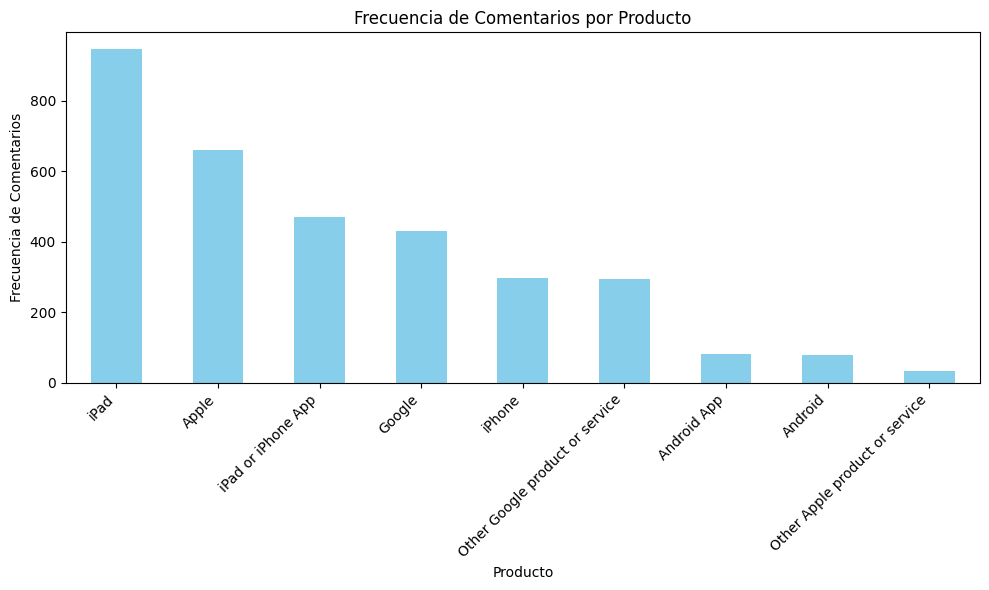

In [ ]:
# Agrupar por el nombre del producto y contar los comentarios
freq = tweets['product'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
freq.plot(kind='bar', color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Frecuencia de Comentarios')
plt.title('Frecuencia de Comentarios por Producto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Productos con mayor número de comentarios: El iPad lidera la lista con la mayor cantidad de comentarios, seguido por Apple. Las aplicaciones de iPad, iPhone y Google también tienen una frecuencia alta, aunque notablemente menor.
Productos con menos comentarios: Otros productos, servicios de Apple y Android tienen una frecuencia bastante baja en comparación con los productos principales.

In [ ]:
tabla_contingencia = pd.crosstab(tweets['product'], tweets['emotion'])
tabla_contingencia

emotion,negative,neutral,positive
product,,,
Android,8,1,69
Android App,8,1,72
Apple,95,23,543
Google,68,16,346
Other Apple product or service,2,1,32
Other Google product or service,47,10,236
iPad,125,28,793
iPad or iPhone App,63,10,397
iPhone,103,10,184


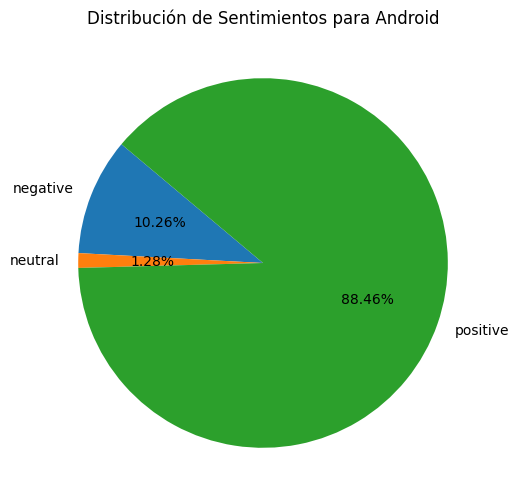

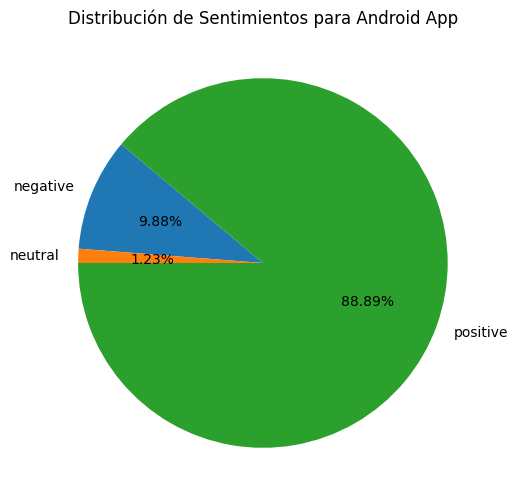

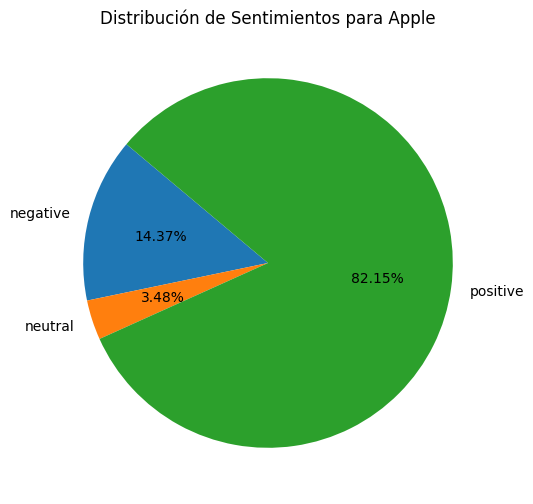

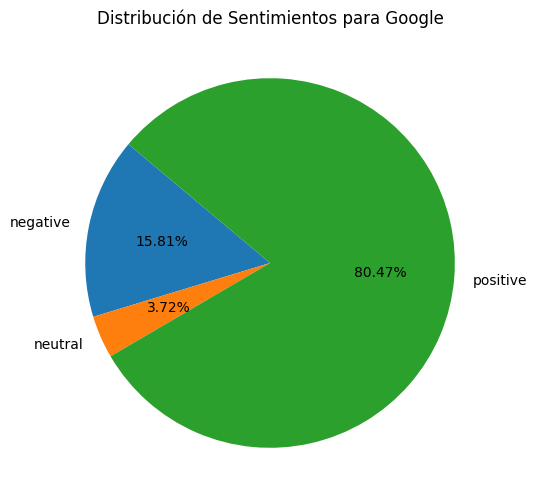

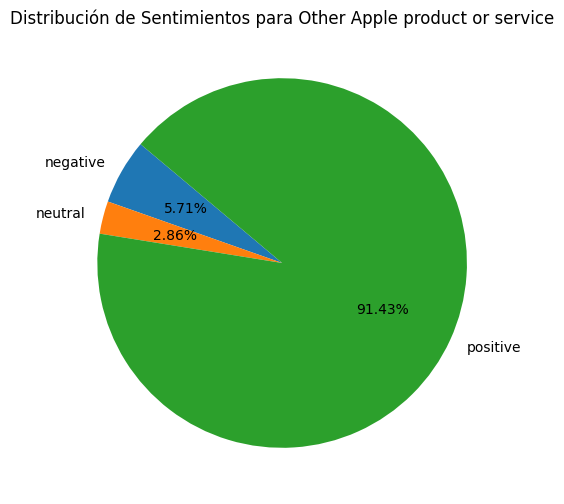

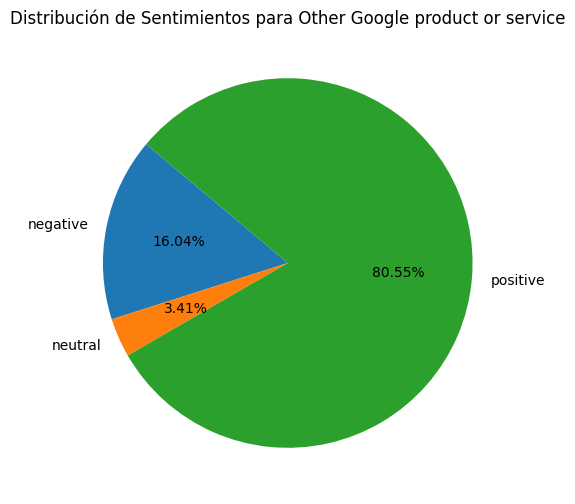

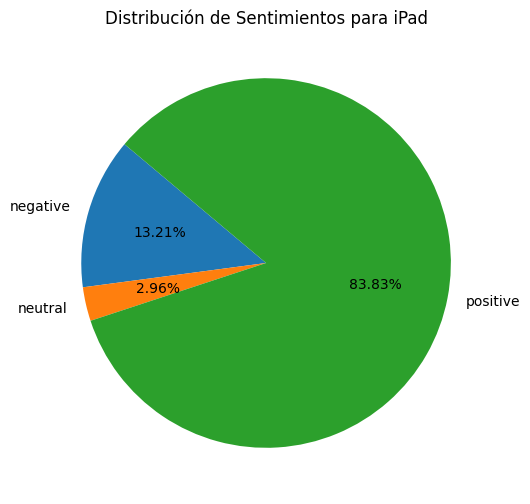

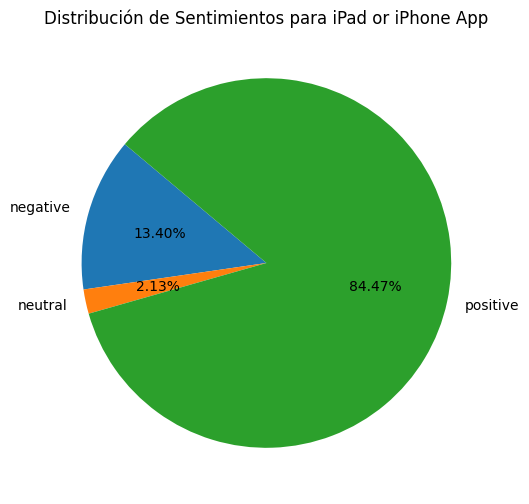

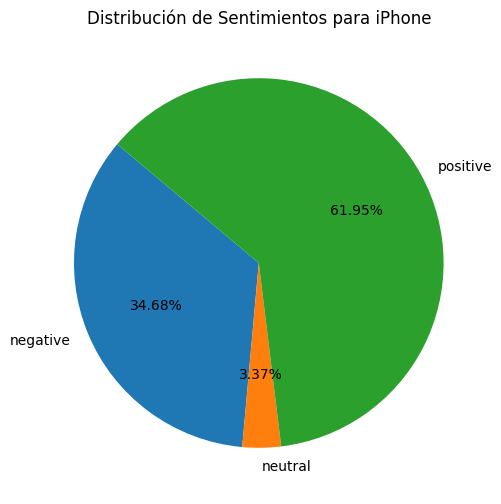

In [ ]:
for producto in tabla_contingencia.index:
    plt.figure(figsize=(6, 6))
    plt.pie(tabla_contingencia.loc[producto], labels=tabla_contingencia.columns, autopct='%1.2f%%', startangle=140)
    plt.title(f'Distribución de Sentimientos para {producto}')
    plt.show()

iPad lidera en el número de comentarios positivos (793), seguido de Apple (543) e iPhone (397).

Los productos de Google y Android App también tienen una proporción considerable de comentarios positivos, con 346 y 72 respectivamente.

En cuanto a los comentarios negativos, iPad y Apple tienen las cifras más altas, con 125 y 95 comentarios respectivamente.

Los productos con la menor cantidad de comentarios en general son aquellos bajo las categorías Other Apple product or service y Other Google product or service, que también tienen menos comentarios negativos, neutrales y positivos.

In [ ]:
tweets.groupby(tweets['emotion']).count()

,tweet,product
emotion,,
negative,570,519
neutral,5544,100
positive,2978,2672


In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def clean_text(text):
    # Transformación a minúsculas
    text = text.lower()

    # Eliminación de usernames (@usuario)
    text = re.sub(r'@\w+', '', text)

    # Eliminación de hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # Eliminación de URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Eliminación de caracteres especiales (mantener solo letras y espacios)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Eliminación de stop-words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if (word not in stop_words) and (len(word) > 2) or (word == 'not'))

    # Devolver el texto limpio
    return text.strip()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweets['tweet_normalized'] = tweets['tweet'].apply(clean_text)
tweets

,tweet,product,emotion,tweet_normalized
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,iphone hrs tweeting dead need upgrade plugin s...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,not wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,hope years festival isnt crashy years iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff fri marissa mayer google tim oreil...
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,positive,ipad everywhere link
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,neutral,wave buzz interrupt regularly scheduled geek p...
9090,"Google's Zeiger, a physician never reported po...",NaN,neutral,googles zeiger physician never reported potent...
9091,Some Verizon iPhone customers complained their...,NaN,neutral,verizon iphone customers complained time fell ...


In [ ]:
tweets[tweets['tweet_normalized'].str.contains('zuckerberg', case=False, na=False)]

,tweet,product,emotion,tweet_normalized
1395,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",NaN,neutral,sxsw tips prince npr videos toy shopping zucke...
1435,Anonymity: Zuckerberg &quot;wrong&quot; says 4...,NaN,neutral,anonymity zuckerberg quotwrongquot says chans ...
1436,Anonymity: Zuckerberg &quot;wrong&quot; says 4...,NaN,neutral,anonymity zuckerberg quotwrongquot says chans ...


In [ ]:
tweets['emotion'].isnull().sum()

0

In [ ]:
# Crear el vectorizador TF-IDF
tfidf = TfidfVectorizer(min_df=1)

# Pasar a la Bolsa de palabras
X = tfidf.fit_transform(tweets['tweet_normalized'])

# Resultados
print(tfidf.get_feature_names_out())  # Obtener las características (palabras)
print(X.toarray())


['aapl' 'aaron' 'abacus' ... 'zuckerberg' 'zynga' 'zzzs']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
y_encoding = {'positive': 1, 'neutral': 0, 'negative': -1}
tweets['emotion_encoded'] = tweets['emotion'].map(y_encoding)
tweets


,tweet,product,emotion,tweet_normalized,emotion_encoded
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,iphone hrs tweeting dead need upgrade plugin s...,-1
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know awesome ipadiphone app youll likely appre...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,not wait also sale,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,hope years festival isnt crashy years iphone app,-1
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff fri marissa mayer google tim oreil...,1
...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,positive,ipad everywhere link,1
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,neutral,wave buzz interrupt regularly scheduled geek p...,0
9090,"Google's Zeiger, a physician never reported po...",NaN,neutral,googles zeiger physician never reported potent...,0
9091,Some Verizon iPhone customers complained their...,NaN,neutral,verizon iphone customers complained time fell ...,0


In [ ]:
from sklearn.model_selection import GridSearchCV

# Variable objetivo
y = tweets['emotion_encoded']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el clasificador KNN
knn = KNeighborsClassifier()

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Tipos de pesos
    'metric': ['euclidean', 'manhattan']  # Métricas
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_
print("Mejores Hiperparámetros:", grid_search.best_params_)

Mejores Hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [ ]:
from joblib import dump, load

dump(best_model, 'modelo_entrenado.joblib')  # Guarda el modelo
knn_model_cargado = load('modelo_entrenado.joblib')  # Carga el modelo


In [ ]:
# Realizar predicciones
y_train_pred = knn_model_cargado.predict(X_train)
y_test_pred = knn_model_cargado.predict(X_test)

# Obtener el informe de clasificación para los datos de prueba
report = classification_report(y_test, y_test_pred)

# Imprimir el informe
print("Informe de clasificación para el conjunto de prueba:\n")
print(report)

# También puedes obtener el informe para el conjunto de entrenamiento
train_report = classification_report(y_train, y_train_pred)
print("Informe de clasificación para el conjunto de entrenamiento:\n")
print(train_report)

Informe de clasificación para el conjunto de prueba:

              precision    recall  f1-score   support

          -1       0.69      0.17      0.27       121
           0       0.66      0.92      0.77      1092
           1       0.68      0.29      0.41       606

    accuracy                           0.66      1819
   macro avg       0.68      0.46      0.48      1819
weighted avg       0.67      0.66      0.62      1819

Informe de clasificación para el conjunto de entrenamiento:

              precision    recall  f1-score   support

          -1       0.92      0.98      0.95       449
           0       0.94      0.99      0.97      4452
           1       0.99      0.89      0.94      2372

    accuracy                           0.96      7273
   macro avg       0.95      0.96      0.95      7273
weighted avg       0.96      0.96      0.96      7273



El modelo muestra un rendimiento excelente en el conjunto de entrenamiento, con un accuracy del 96% y métricas muy altas en todas las clases.
Sin embargo, esta alta precisión en el entrenamiento comparada con el rendimiento más bajo en el conjunto de prueba sugiere que el modelo podría estar sobreajustado.El modelo maneja bien la clase mayoritaria (clase "0": neutral), pero tiene dificultades para generalizar a las clases minoritarias ("-1": negative y "1": positive), lo que se refleja en los bajos valores de recall y f1-score para estas clases en el conjunto de prueba.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metrics = {
        "accuracy_train": accuracy_score(y_train, y_pred_train),
        "accuracy_test": accuracy_score(y_test, y_pred_test),
        "precision_train": precision_score(y_train, y_pred_train, average='weighted'),
        "precision_test": precision_score(y_test, y_pred_test, average='weighted'),
        "recall_train": recall_score(y_train, y_pred_train, average='weighted'),
        "recall_test": recall_score(y_test, y_pred_test, average='weighted'),
        "f1_train": f1_score(y_train, y_pred_train, average='weighted'),
        "f1_test": f1_score(y_test, y_pred_test, average='weighted'),
    }
    return metrics

# Definir los modelos
models = {
    'Naive Bayes-Bernoulli': BernoulliNB(),
    'Naive Bayes-Multinomial': MultinomialNB(),
    'Regresión Logística': LogisticRegression(max_iter=1000),
    'SVM (SVC)': SVC(),
    'Árboles de Decisión': DecisionTreeClassifier()
}


# Definir los vectores de TF y TF-IDF
vectorizers = {
    'TF': CountVectorizer(),
    'TF-iDF': TfidfVectorizer()
}

# Dataframes para almacenar los resultados
results_tf = []  # Use a list to store results
results_tfidf = []  # Use a list to store results

# Assuming 'tweets' is your DataFrame with a 'content' column containing the text
X = tweets['tweet_normalized']

# Split the data before vectorization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluar los modelos con ambas representaciones
for vec_name, vectorizer in vectorizers.items():
    # Vectorización
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    for model_name, model in models.items():
        metrics = train_and_evaluate(model, X_train_vec, X_test_vec, y_train, y_test)

        # Guardar los resultados en la lista correspondiente
        if vec_name == 'TF':
            results_tf.append(pd.Series(metrics, name=model_name))
        else:
            results_tfidf.append(pd.Series(metrics, name=model_name))

results_tf = pd.DataFrame(results_tf)
results_tfidf = pd.DataFrame(results_tfidf)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar pandas para mostrar tablas más legibles
pd.set_option('display.float_format', '{:.2f}'.format)

# Visualización de las tablas con estilo
def display_results_table(results, title):
    # Aplicar gradiente solo a las columnas de las métricas de prueba
    styled_table = results.style.set_caption(title) \
        .background_gradient(cmap="Blues", subset=['accuracy_test', 'precision_test', 'recall_test', 'f1_test']) \
        .highlight_max(axis=0, color='lightgreen') \
        .highlight_min(axis=0, color='lightcoral')

    return styled_table

# Mostrar los resultados con estilo
print("Resultados con TF:")
display(display_results_table(results_tf, "Resultados con TF"))

print("\nResultados con TF-iDF:")
display(display_results_table(results_tfidf, "Resultados con TF-iDF"))


Resultados con TF:


,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
Naive Bayes-Bernoulli,0.799533,0.651457,0.809123,0.630426,0.799533,0.651457,0.777316,0.614218
Naive Bayes-Multinomial,0.832944,0.656954,0.831125,0.643270,0.832944,0.656954,0.828189,0.640734
Regresión Logística,0.901691,0.670148,0.904074,0.658135,0.901691,0.670148,0.900002,0.658490
SVM (SVC),0.871167,0.683342,0.883940,0.685553,0.871167,0.683342,0.864141,0.649431
Árboles de Decisión,0.956964,0.643760,0.958563,0.631799,0.956964,0.643760,0.956547,0.634570



Resultados con TF-iDF:


,accuracy_train,accuracy_test,precision_train,precision_test,recall_train,recall_test,f1_train,f1_test
Naive Bayes-Bernoulli,0.799533,0.651457,0.809123,0.630426,0.799533,0.651457,0.777316,0.614218
Naive Bayes-Multinomial,0.760896,0.656405,0.800313,0.687406,0.760896,0.656405,0.721477,0.590684
Regresión Logística,0.814382,0.673997,0.827171,0.666129,0.814382,0.673997,0.795549,0.642792
SVM (SVC),0.902241,0.687741,0.908980,0.688417,0.902241,0.687741,0.898281,0.660112
Árboles de Decisión,0.956964,0.627268,0.958563,0.611584,0.956964,0.627268,0.956547,0.616477


SVM (SVC) es el mejor modelo en términos de accuracy_test con ambos enfoques, destacándose con un 68.7% usando TF-iDF.
Regresión Logística también muestra un rendimiento competitivo, especialmente con TF-iDF, lo que indica que esta representación es útil para este modelo.
Naive Bayes-Multinomial parece beneficiarse más de TF que de TF-iDF, mientras que Árboles de Decisión muestra signos de sobreajuste, especialmente en el conjunto de entrenamiento, lo que lo hace menos adecuado en este contexto.
En general, los modelos SVM y Regresión Logística parecen los más adecuados para este conjunto de datos, con un rendimiento sólido y consistente usando la representación TF-iDF.